### Phase Portrait Classification

In [1]:
import numpy as np
import sympy as sp
import scipy 
import matplotlib.pyplot as plt
from sympy import Matrix
import cv2
from cv2 import *
from scipy.optimize import least_squares, lsq_linear
import sys
import cma
from sklearn.cluster import KMeans
from numpy.linalg import lstsq

#### Generating Phase Portraits

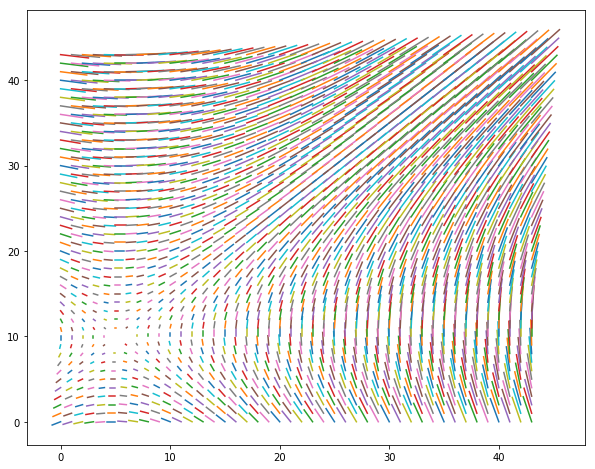

In [6]:
### Uncomment one of the A and b matrix pairs for different types of phase portraits 

##Circle/Center
# A= np.array([[0, 3],[-3,0]])
# b = [-5,5]

##Star
# A= np.array([[1, 0],[0,1]])
# b= [-10,-10]

##Saddle
A= np.array([[0, 1],[1,0]])
b = [-10,-5]

##Spiral
# A= np.array([[0, 1],[-1,-1]])
# b = [-10,10]

##Node
# A= np.array([[-4, -2],[-2,-4]])
# b = [50,50]

# A =np.array([[0.0727319840161632, 0], [0, -0.481152931511145]] )


#### Generate NOISE in the flow pattern
sigma = 0.0



## Window Size
w_size = 11


#To change Image scale
Im_size = 1


N = 22 * Im_size
# N=11



X_dash =  np.zeros((N*2,N*2,2))
x_derivative = np.zeros((N*2,N*2))
y_derivative = np.zeros((N*2,N*2))


#### change value to shift centres/critical point 
# b = [-5,4] 

# To generate different flows in different sections of the image
for i in range (0,N) :
    for j in range (0,N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0] + (sigma * np.random.randn(1,1) + 0)
        X_dash[i,j,1]=A[1].dot(pos) + b[1] + (sigma * np.random.randn(1,1) + 0)
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]

       
        
# A= np.array([[0, 1],[1,0]])
for i in range (0,N) :
    for j in range (N,2*N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0] + (sigma * np.random.randn(1,1) + 0)
        X_dash[i,j,1]=A[1].dot(pos) + b[1] + (sigma * np.random.randn(1,1) + 0)
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]
        
# b = [-35,35]        
# A= np.array([[0, 1],[-1,0]])
for i in range (N,2*N) :
    for j in range (0,N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0] + (sigma * np.random.randn(1,1) + 0)
        X_dash[i,j,1]=A[1].dot(pos) + b[1] + (sigma * np.random.randn(1,1) + 0)
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]

# b = [-15,15]        
# A= np.array([[1, 0],[0,1]])
for i in range (N,2*N) :
    for j in range (N,2*N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0] + (sigma * np.random.randn(1,1) + 0)
        X_dash[i,j,1]=A[1].dot(pos) + b[1] + (sigma * np.random.randn(1,1) + 0)
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]

#Image flow        
# X_dash = flow_sub        
        
# print X_dash 
fig = plt.figure(figsize=(10,8))

for x in range(0,2*N):
    for y in range(0,2*N):
        plt.plot([x,x+X_dash[x,y,0]/13],[y,y+X_dash[x,y,1]/13],'-')

fixed_map = np.zeros((N*2,N*2))
flow1 = X_dash
# plt.plot(-b[0],-b[1],'*')
# plt.savefig('saddle_str1.png', bbox_inches='tight')

#### Orientation Image-  Function

In [7]:
def orientation_image(): 
    N =44
    r_1 =np.zeros((N,N))
    r_2 = np.zeros((N,N))
    theta_1 = np.zeros((N,N))
    theta_sin = np.zeros((N,N))
    theta_cos = np.zeros((N,N))
     
    for i in range (0,N):
        for j in range (0,N):
            pos = np.array([i,j]).T
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
    
    return theta_1

#### LMS

In [4]:
def lms(para,x,y,zet):
    return np.mean(np.square(np.cos(para[0])*x + np.sin(para[0])*y + (para[1]) ))
#     return 1/2 *np.sum((np.square(np.cos(para[0])*x + np.sin(para[0])*y + (para[1]) )))
#  return np.median(np.square(para[0]*x + para[1]*y + para[2])) # + 1*np.abs( np.square(para[0])+np.square(para[1])-1)))


#### Sampling - Cluster points by their orientation angle

0
179


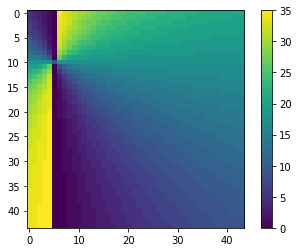

In [8]:
xx=yy=0
step_N = 44
X_dash_sect = X_dash[0+xx*step_N:step_N+xx*step_N,0+yy*step_N:step_N+yy*step_N,:] +0.00001
flow1=X_dash_sect
k = 0.17
orient = (orientation_image())
n= 3.14/(0.17/2)
orient = orient*180/3.14
orient =  (orient).astype(int)
# for x in orient:
#     x= [y+180 for y in x if y<0]
# [y+180 for y in orient[:,] if y<0]

for i in range(orient.shape[0]):
    for j in range (orient.shape[1]):
        if orient[i,j]<0:
            orient[i,j]+=180
# orient = orient*3.14/180
print np.min(orient)
print np.max(orient)
clust_full =[]
clust_image = np.zeros((step_N,step_N))
for i in range (int(n)):
    thet_start =  0.0 +i*5
    thet_end = thet_start + 5
#     print  thet_start, thet_end
#     orient_loc_st = np.where(orient>70)
#     orient_loc_end = np.where(orient<80)
    clust_section = []
    for x in range(0,step_N):
        for y in range(step_N):
            if orient[x,y]>=thet_start and orient[x,y]<thet_end :
                clust_section.append((x,y))
                clust_image[x,y] = i
    clust_full.append(clust_section)
#     x_points = set(orient_loc_st).intersection(orient_loc_end)
# print orient_loc_st[0]
# print orient_loc_end[0]
# print x_points
# print clust_section
plt.imshow(clust_image.T)
plt.colorbar()
# plt.ylim(0,21)

#### Fit lines - To  points with similar orientation

3.122555555555556
(1936,)
(1936, 1)
36
0.420773


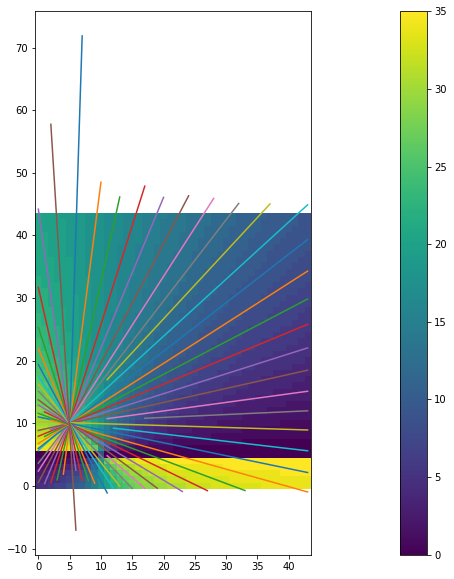

In [10]:
import time
start = time.clock()

np.set_printoptions(threshold=np.nan)
fig = plt.figure(figsize=(40,10))
xx=0
yy=0
step_N = 44
X_dash_sect = X_dash[0+xx*step_N:step_N+xx*step_N,0+yy*step_N:step_N+yy*step_N,:] +0.00001
flow1=X_dash_sect

orient_1 = orient*3.14/180

orient_1d = orient_1.flatten()
print np.max(orient_1d)
print orient_1d.shape
X_dash_1d = orient_1d


X_dash_2d = X_dash_1d.reshape(step_N,step_N)
X_dash_1d_sh = X_dash_1d.reshape(-1,1)
print X_dash_1d_sh.shape

no_of_clust = 18

clust_pred = clust_image.flatten()

clust_pred_2d = clust_image

plt.imshow(clust_pred_2d)
plt.gca().invert_yaxis()
plt.colorbar(fraction=0.025, pad=0.04)

# print clust_pred
clusts_uniq = np.unique(clust_pred)

print len(clusts_uniq)
para = [0,0]
omega = [] 
tans = []
mean_tans = []
e=[]
f=[]
mean_lms = []
for i,val in enumerate(clusts_uniq):
#     print i
    clusts_loc = np.where(clust_pred_2d==val)
    mean_tans.append(abs(np.mean((orient_1[clusts_loc]))))
    check = (np.mean((orient_1[clusts_loc])))
#     print 'c',check
    zeta_clust = np.tan(np.mean((orient_1[clusts_loc])))
#     print zeta_clust
#     tans.append(np.tan(orient[clusts_loc]))
#     print clusts_loc
#     print clusts_loc[0]
    x_points = clusts_loc[0][np.newaxis].T
    y_points = clusts_loc[1][np.newaxis]
    
#     lms_val = lms(para,x_points,y_points.T) 
#     print lms_val
#     lms_opt = scipy.optimize.least_squares(lms,para,loss='soft_l1', f_scale=0.1,args=(x_points, y_points.T,zeta_clust))
    lms_opt = scipy.optimize.minimize(lms,para,args=(x_points, y_points.T,zeta_clust))
    mean_lms.append(lms_opt.fun)


#     print lms_opt.fun
#     print lms_opt.x
    p= lms_opt.x 
#     print (p)
#     e.append(p[1])
#     f.append(p[2])
#     omega.append(lms_opt.x)
    ones_ar = np.ones((x_points.shape[0],1))
    x_points_ar = np.hstack((x_points,ones_ar))
#     p = np.linalg.pinv(x_points_ar).dot(y_points.T)
    if  len(orient_1[clusts_loc])>1 : #and (lms_opt.fun) < np.std(mean_lms) +2 : #and ((check>0.3 and check<1.3) or (check>1.8 and check<2.8) or (check>3.4 and check<4.5) or (check > 4.9 and check<6.1)): 
        omega.append([np.cos(p[0]),np.sin(p[0]),p[1]])
#         print 'orient', (orient_1[clusts_loc])
        tans.append((orient_1[clusts_loc]))
        mean_lms.append(lms_opt.fun)
#         e.append(p[1])
#         f.append(p[2])
        
#         print 'mean', lms_opt.fun
#         print 'alpha',np.cos(p[0]),'beta', np.sin(p[0])
#         print 'tans', np.mean(orient_1[clusts_loc])
#         print 'line'

#     print omega
#     p= lms_opt.x 
#     print p[0],p[1] 
#     print x_points.shape, y_points.shape, x_points_ar.shape 
        x_plot = np.arange(0,30)
        plt.plot(x_points, -(np.cos(p[0])*x_points + (p[1]) )/np.sin(p[0]))


print time.clock() - start

#### Critical Point- LMS

36
Time taken: 0.006651 seconds
Critical Point at: [ 4.95854386 10.00043637]


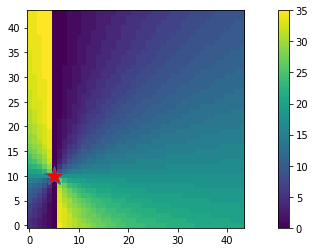

In [11]:

import cma
print len(omega)
def crit_lms(crit_point,omega):
    omega_1= np.array(omega).reshape(-1,3)
    crit_point_1=np.array([crit_point[0],crit_point[1],1])
    mse =  np.square(omega_1.dot(crit_point_1)/np.sqrt((omega_1[:,0]*omega_1[:,0] + omega_1[:,1]*omega_1[:,1])))
    med_val =  np.mean(np.square(omega_1.dot(crit_point_1)/np.sqrt(list(omega_1[:,0]*omega_1[:,0] + omega_1[:,1]*omega_1[:,1]))))
#     print mse
    
    return med_val

import time
start = time.clock()

crit_init = [0,0]
crit_opt= scipy.optimize.minimize(crit_lms,crit_init,omega) 
print 'Time taken:', time.clock() - start,'seconds'
print 'Critical Point at:', crit_opt.x    

# es = cma.CMAEvolutionStrategy(crit_init, 0.5, {'tolx' : 1e-3, 'tolfun': 1e-3})
# # print mse
# res_1 = es.optimize(crit_lms)
# print res_1.result.xbest
plt.imshow(clust_pred_2d.T)
plt.gca().invert_yaxis()
plt.colorbar(fraction=0.045, pad=0.1)    
plt.plot(crit_opt.x[0],crit_opt.x[1],'*',markersize = 20, markerfacecolor= 'red')  
cp = crit_opt.x
plt.savefig('crit_estp1_loc.png', bbox_inches='tight')

#### Classification of Phase Portraits

In [48]:

flow1 = X_dash[:,:,:]
cp = cp.astype(int)
x_pos, y_pos = np.mgrid[-cp[0]:-cp[0]+22,-cp[1]:-cp[1]+22]
# print 
x_i = x_pos.flatten()[np.newaxis].T
# print x_i
y_i = y_pos.flatten()[np.newaxis].T
# print y_i
pos_ar = np.hstack((x_i,y_i))
# print np.shape(pos_ar)


flow_dx_orig = flow1[:,:,0].reshape(-1,)
flow_dy_orig = flow1[:,:,1].reshape(-1,)
# print np.shape(flow_dx_orig)
flow_dx_dy = np.vstack((flow_dx_orig,flow_dy_orig)).T
print np.shape(pos_ar)
print np.shape(flow_dx_dy)

import time
start = time.clock()
res_tot = np.linalg.lstsq(pos_ar, flow_dx_dy)
print np.shape(res_tot)
print res_tot[0]
eigval_pr, eigvec_pr = np.linalg.eig(res_tot[0])
print 'Predicted Eigen Values:',eigval_pr
print 'Time taken for classification:',time.clock() - start,'seconds'


x0 = np.array([[0.5],[0.5]])

# flow_pred_dx = pos_ar.dot(x0)
# print flow_pred_dx.shape
# dx_diff = abs(flow_pred_dx - flow_dx_orig)....
# print dx_diff.shape
# total_diff = np.sum(dx_diff)
# total_diff


import time
start = time.clock()


res_1 = lsq_linear(pos_ar, flow_dx_orig,lsmr_tol='auto') #, bounds=(lb, ub), lsmr_tol='auto')
# print res_1.x
a_up = res_1.x


res_2 = lsq_linear(pos_ar, flow_dy_orig,lsmr_tol='auto') #, bounds=(lb, ub), lsmr_tol='auto')
# print res_2.x
a_down = res_2.x


A_pred  = np.vstack((a_up,a_down))
eigval_pr, eigvec_pr = np.linalg.eig(A_pred)
print 'Predicted Eigen Values:',eigval_pr


print 'Time taken for classification:',time.clock() - start,'seconds'


#### Classification
m = Matrix(A_pred)
P, J = m.jordan_form()
print 'Jordan'
print J


# fit_map = np.zeros((22,22))

node=1
saddle=2
star=3
improper=4
center=5
spiral=6



root1 = eigval_pr[0]
# print root1
root2 = eigval_pr[1]
l_1 = J[0,0]
l_2 = J[1,1]
imp = J[0,1]
xx=0
yy=0



if isinstance(root1,complex):
    alpha = root1.real
    if abs(alpha)<2e-1:
        phase= 'Center'
#       fit_map[0+xx*11:11+xx*11 , 0+yy*11:11+yy*11]
    else:
        phase = 'Spiral'
elif ((np.sign(l_1)==np.sign(l_2)) and (abs(abs(l_1)-abs(l_2))<= 9e-1)):
    if (1-imp)<0.1:
        phase = 'Imroper'
    else:
        phase = 'Star'
    

#       fit_map[0+xx*11:11+xx*11 , 0+yy*11:11+yy*11] = star
#       print fit_map

elif (abs(abs(l_1)-abs(l_2))>9e-1) and (np.sign(l_1)==np.sign(l_2)):
    phase = 'Node'
            
elif ((np.sign(l_1)!=np.sign(l_2))):
    phase = 'Saddle'
            
print '*************Phase Portrait Classification*******************'

print 'Type:' , phase
     
     
     
     
    


(484, 2)
(484, 2)
(4,)
[[0.07458976 1.07458976]
 [1.10442566 0.10442566]]
Predicted Eigen Values: [-1.          1.17901542]
Time taken for classification: 0.012572 seconds
Predicted Eigen Values: [-1.          1.17901542]
Time taken for classification: 0.021147 seconds


/home/pranav/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Jordan
Matrix([[1.17901541521631, 0], [0, -1.00000000000000]])
*************Phase Portrait Classification*******************
Type: Saddle


#### Classifying Section of Phase Portrait

In [6]:
## Different Quadrants
# flow_man = X_dash[0:11,-11:,:] +0.00001
# flow_man = X_dash[0:11,0:11,:] +0.00001
#flow_man = X_dash[-11:,0:11,:] +0.00001
#flow_man = X_dash[-11:,-11:,:] +0.00001

# a[0:11,0:11] = a[0:11,0:11]*2
# a[0:11,-11:] = a[0:11,-11:]*1
# a[-11:,0:11] = a[-11:,0:11]*3
# a[-11:,-11:] = a[-11:,-11:]*4

# flow1 = flow_man                         #+ 0.0000001 #np.ones(((5,5,2)))*0.05
# print flow1
# fig =plt.figure(figsize=(20,10))
plt_id =0
w_size = 11
# fixed_map = np.zeros((22,22))

# n_windows= (N*2)/w_size
domin_r_1 = []
domin_theta_1 =[]

flow_x = np.shape(X_dash)[0]
flow_y = np.shape(X_dash)[1]


n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
print n_windows_x
print n_windows_y

dom_image = np.zeros((n_windows_x,n_windows_y,2))

for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):
#         xx=1
#         yy =1
        if 11+xx*11>flow_x or 11+yy*11 > flow_y:
            print 'hit limit'
            break
        else:
            flow_man = X_dash[0+xx*11:11+xx*11,0+yy*11:11+yy*11,:] +0.00001
            flow1 = flow_man
            plt_id+=1
#             plt.subplot(n_windows_x,n_windows_y,plt_id)
            dr,dt1  = dominant_orientation()
            domin_r_1.append(dr)
            domin_theta_1.append(dt1)
#             dom_image[xx,yy,0] = dr*np.cos(dt1)
#             dom_image[xx,yy,1] = dr*np.sin(dt1)
            
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,0] = (dr*np.cos(dt1))
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,1] = (dr*np.sin((dt1)))
            dom_image[xx,yy,0] = flow_man[w_size/2,w_size/2,0]
            dom_image[xx,yy,1] = flow_man[w_size/2,w_size/2,1]
            print xx,yy
#             for x in range(0,w_size):
#                 for y in range(0,w_size):
#                     if x==w_size/2 and y==w_size/2:
#                         plt.plot([x,x+flow_man[x,y,0]/1],[y,y+flow_man[x,y,1]/1],'r-')
#                     else:
#                         plt.plot([x,x+flow_man[x,y,0]/16],[y,y+flow_man[x,y,1]/16],'g-')
# plt.show()
# flow1

2
2
0 0
0 1
1 0
1 1


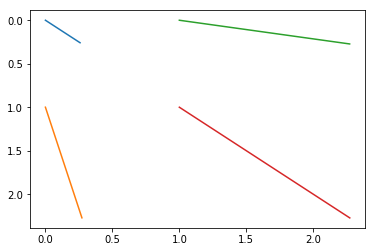

In [7]:
# fig =plt.figure(figsize=(20,10))
for x in range(0,n_windows_x):
    for y in range(0,n_windows_y):
        plt.plot([x,x+dom_image[x,y,0]/1],[y,y+dom_image[x,y,1]/1],'-')
plt.gca().invert_yaxis()
plt.show()


0.10700268298387527


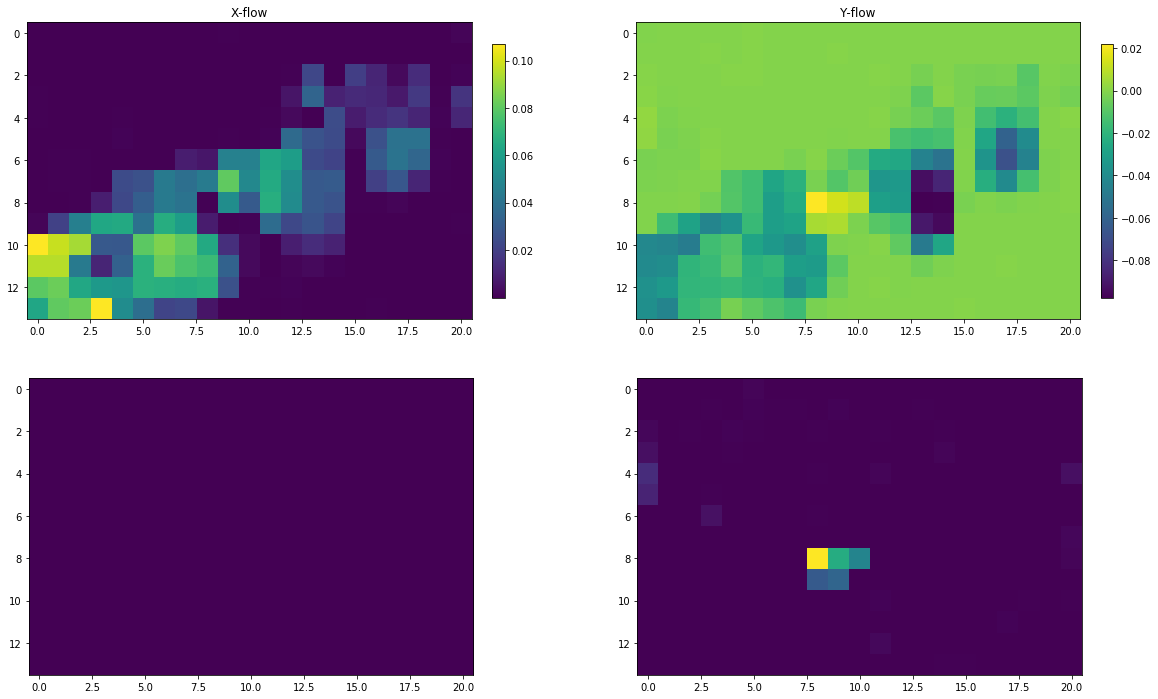

In [7]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.imshow(dom_image[:,:,0].T)
plt.title('X-flow')
plt.colorbar(fraction=0.025, pad=0.04)

plt.subplot(2,2,2)
plt.title('Y-flow')
plt.imshow(dom_image[:,:,1].T)
plt.colorbar(fraction=0.025, pad=0.04)
print np.max(dom_image[:,:,0])
dom_image_x= dom_image[:,:,0]
dom_image_xclip = dom_image_x.clip(min=2.)
plt.subplot(2,2,3)
plt.imshow(dom_image_xclip.T)
dom_image_y= dom_image[:,:,1]
dom_image_yclip = dom_image_y.clip(min=0.)
plt.subplot(2,2,4)
plt.imshow(dom_image_yclip.T)

# print np.shape(np.array(domin_r_1).reshape(56,34))


0.11485061834303809


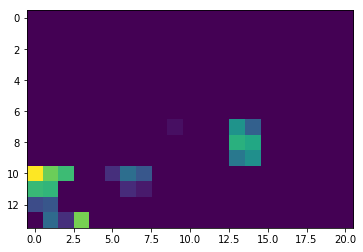

In [8]:
domin_plot = np.array(domin_r_1).reshape(21,14)
print np.max(domin_plot)
domin_plot_clip = domin_plot.clip(min=0.08)
plt.imshow(domin_plot_clip.T)

#### Smoothening Further

In [ ]:
# def dominant_orientation_final(flow): 
#     N =11
#     r_1 =np.zeros((N,N))
#     r_2 = np.zeros((N,N))
#     theta_1 = np.zeros((N,N))
#     theta_sin = np.zeros((N,N))
#     theta_cos = np.zeros((N,N))
     
#     for i in range (0,N):
#         for j in range (0,N):
#             pos = np.array([i,j]).T
#             r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
#             theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
#             theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
#             theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
#     dom_theta= (np.arctan(np.sum(flow1[:,:,1])/np.sum(flow1[:,:,0])))
#     dom_r_1= r_1[N/2,N/2] * np.sum(np.linalg.norm(r_1*np.cos((dom_theta-theta_1))))/np.sum((r_1))
# #     print dom_r_1
# #     print dom_theta 
    
#     return dom_r_1,dom_theta


In [33]:
## Different Quadrants
# flow_man = X_dash[0:11,-11:,:] +0.00001
# flow_man = X_dash[0:11,0:11,:] +0.00001
#flow_man = X_dash[-11:,0:11,:] +0.00001
#flow_man = X_dash[-11:,-11:,:] +0.00001

# a[0:11,0:11] = a[0:11,0:11]*2
# a[0:11,-11:] = a[0:11,-11:]*1
# a[-11:,0:11] = a[-11:,0:11]*3
# a[-11:,-11:] = a[-11:,-11:]*4

# flow1 = flow_man                         #+ 0.0000001 #np.ones(((5,5,2)))*0.05
# print flow1
# fig =plt.figure(figsize=(20,10))

print np.shape(dom_image)
plt_id =0
w_size = 11
# fixed_map = np.zeros((22,22))
dom_image = dom_image*10
# n_windows= (N*2)/w_size
domin_r_1 = []
domin_theta_1 =[]

flow_x = np.shape(dom_image)[0]
flow_y = np.shape(dom_image)[1]


n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
print n_windows_x
print n_windows_y

dom_image_final = np.zeros((n_windows_x,n_windows_y,2))

for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):
#         xx=1
#         yy =1
        if 11+xx*11>flow_x or 11+yy*11 > flow_y:
            print 'hit limit'
            break
        else:
            flow_man = dom_image[0+xx*11:11+xx*11,0+yy*11:11+yy*11,:] +0.00001
            flow1 = flow_man
            plt_id+=1
#             plt.subplot(n_windows_x,n_windows_y,plt_id)
            dr,dt1  = dominant_orientation()
            domin_r_1.append(dr)
            domin_theta_1.append(dt1)
#             dom_image[xx,yy,0] = dr*np.cos(dt1)
#             dom_image[xx,yy,1] = dr*np.sin(dt1)
            
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,0] = (dr*np.cos(dt1))
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,1] = (dr*np.sin((dt1)))
            dom_image_final[xx,yy,0] = flow_man[w_size/2,w_size/2,0]
            dom_image_final[xx,yy,1] = flow_man[w_size/2,w_size/2,1]
            print xx,yy
#             for x in range(0,w_size):
#                 for y in range(0,w_size):
#                     if x==w_size/2 and y==w_size/2:
#                         plt.plot([x,x+flow_man[x,y,0]/1],[y,y+flow_man[x,y,1]/1],'r-')
#                     else:
#                         plt.plot([x,x+flow_man[x,y,0]/16],[y,y+flow_man[x,y,1]/16],'g-')
# plt.show()
# flow1




(10, 14, 2)
0
1


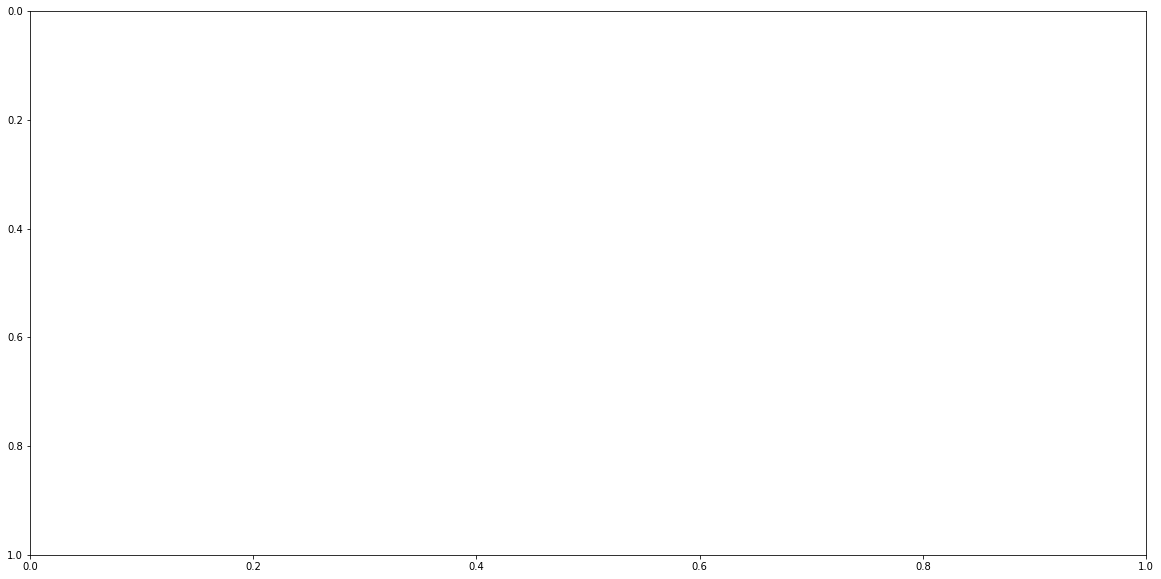

In [34]:
fig =plt.figure(figsize=(20,10))
for x in range(0,n_windows_x):
    for y in range(0,n_windows_y):
        plt.plot([x,x+dom_image_final[x,y,0]/3],[y,y+dom_image_final[x,y,1]/3],'-')
plt.gca().invert_yaxis()
plt.show()

In [66]:
def sum_of_areas_final(x0_in): 
    x0 = np.array([[x0_in[0],x0_in[1]],[x0_in[2],x0_in[3]],[x0_in[4],x0_in[5]]])
    N1 =np.shape(dom_image_final)[0]
    N2 =np.shape(dom_image_final)[1]
    
    A_12 =  np.zeros((N1,N2))
    r_1 =np.zeros((N1,N2))
    r_2 = np.zeros((N1,N2))
    theta_1 = np.zeros((N1,N2))
    theta_2 = np.zeros((N1,N2))
    theta_sin = np.zeros((N1,N2))
    theta_cos = np.zeros((N1,N2))
    
    
#     N=11
      
    for i in range (0,N1):
        for j in range (0,N2):
            pos = np.array([i,j]).T
            
            r_1[i,j] = np.sqrt(dom_image_final[i][j][0]**2+dom_image_final[i][j][1]**2)
            r_2[i,j] = np.sqrt((x0[0].dot(pos)+x0[2,0])**2+(x0[1].dot(pos)+x0[2,1])**2) #np.sqrt(flow1[0][0][0]**2+flow1[0][0][1]**2)
            #print r_1
            #print r_2
            theta_1 [i,j]= np.arctan(dom_image_final[i][j][1]/dom_image_final[i][j][0])
            theta_2[i,j] = np.arctan((x0[1].dot(pos)+x0[2,1])/(x0[0].dot(pos)+x0[2,0]))#np.arctan(flow1[0][0][1]/flow1[0][0][0])
            #print theta_1,theta_2
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
            
            A_12[i,j]= 0.5 *r_1[i,j]*r_2[i,j]* abs(np.sin(theta_1[i,j] - theta_2[i,j])) #abs((theta_1[i,j] - theta_2[i,j]))
    S = np.sum(A_12)
    #print S
#     print A_12
    dom_theta = (np.arctan(np.sum(theta_sin)/np.sum(theta_cos))/2)
    dom_r_1=(r_1[N1/2,N2/2]*np.sum(abs(r_1*np.cos(dom_theta-theta_1)))/np.sum(r_1))
#     print dom_r_1
#     print dom_theta
    #S= x0_in**2
    print r_1
    print theta_1
    return S
    #theta_1[0,0]

node=1
saddle=2
star=3
improper=4
center=5
spiral=6
x0_sum_of_area = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
res_1 = least_squares(sum_of_areas_final, x0_sum_of_area,ftol=1e-3)
A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])
A_eig,v  = np.linalg.eig(A_final)
print A_eig
print b_final
x_zero = -np.linalg.pinv(A_final).dot(b_final)
print 'zero:',x_zero

m = Matrix(A_final)
P, J = m.jordan_form()

root1 = A_eig[0]
root2 = A_eig[1]
l_1 = J[0,0]
l_2 = J[1,1]
imp = J[0,1]
print l_1,l_2
fit_map = np.zeros((np.shape(dom_image_final)[0],np.shape(dom_image_final)[1]))
if isinstance(root1,complex):
            alpha = root1.real
            if abs(alpha)<1e-2:
                phase= 'center'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= center
            else:
                phase = 'spiral'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= spiral
elif ((abs(l_1) - abs(l_2))<= 1e-1 ): #and np.sign(l_1)==np.sign(l_2) ):
    if (1-imp)<0.1:
        phase = 'imroper'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= improper
    else:
        phase = 'star'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11] = star
#                 print fit_map

elif(abs(abs(l_1)-abs(l_2))>1e-3):
    if (np.sign(l_1)==np.sign(l_2)):
        phase = 'node'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= node
    else:
        phase = 'saddle'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= saddle
elif np.sign(l_1)!= np.sign(l_2):
    phase = 'saddle'
    fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= saddle
else:
    phase = 'none'


print phase




[[2.77090561e-01 8.65511541e-01 3.80940066e-01]
 [1.28748241e-05 2.39591333e-01 3.19923801e-01]
 [8.96979508e-06 1.90240739e-02 2.06982015e-01]
 [2.28456603e-01 2.75935277e-01 1.25156908e-04]
 [6.63212950e-01 1.82202260e-01 5.56394283e-04]]
[[ 0.18038795 -0.04148535 -0.22203835]
 [ 0.17060649 -0.12111141 -0.65841394]
 [-0.30755738  0.02812734  0.10954299]
 [-0.3049368   0.07339246  0.68564985]
 [-0.22099713 -0.01596253  0.17234971]]
[[2.77090561e-01 8.65511541e-01 3.80940066e-01]
 [1.28748241e-05 2.39591333e-01 3.19923801e-01]
 [8.96979508e-06 1.90240739e-02 2.06982015e-01]
 [2.28456603e-01 2.75935277e-01 1.25156908e-04]
 [6.63212950e-01 1.82202260e-01 5.56394283e-04]]
[[ 0.18038795 -0.04148535 -0.22203835]
 [ 0.17060649 -0.12111141 -0.65841394]
 [-0.30755738  0.02812734  0.10954299]
 [-0.3049368   0.07339246  0.68564985]
 [-0.22099713 -0.01596253  0.17234971]]
[[2.77090561e-01 8.65511541e-01 3.80940066e-01]
 [1.28748241e-05 2.39591333e-01 3.19923801e-01]
 [8.96979508e-06 1.90240739e-0

[[2.77090561e-01 8.65511541e-01 3.80940066e-01]
 [1.28748241e-05 2.39591333e-01 3.19923801e-01]
 [8.96979508e-06 1.90240739e-02 2.06982015e-01]
 [2.28456603e-01 2.75935277e-01 1.25156908e-04]
 [6.63212950e-01 1.82202260e-01 5.56394283e-04]]
[[ 0.18038795 -0.04148535 -0.22203835]
 [ 0.17060649 -0.12111141 -0.65841394]
 [-0.30755738  0.02812734  0.10954299]
 [-0.3049368   0.07339246  0.68564985]
 [-0.22099713 -0.01596253  0.17234971]]
[[2.77090561e-01 8.65511541e-01 3.80940066e-01]
 [1.28748241e-05 2.39591333e-01 3.19923801e-01]
 [8.96979508e-06 1.90240739e-02 2.06982015e-01]
 [2.28456603e-01 2.75935277e-01 1.25156908e-04]
 [6.63212950e-01 1.82202260e-01 5.56394283e-04]]
[[ 0.18038795 -0.04148535 -0.22203835]
 [ 0.17060649 -0.12111141 -0.65841394]
 [-0.30755738  0.02812734  0.10954299]
 [-0.3049368   0.07339246  0.68564985]
 [-0.22099713 -0.01596253  0.17234971]]
[[2.77090561e-01 8.65511541e-01 3.80940066e-01]
 [1.28748241e-05 2.39591333e-01 3.19923801e-01]
 [8.96979508e-06 1.90240739e-0

0.283682949276688 0.597542239901820
star


#### Target function to be minimized

In [89]:

def sum_of_areas(x0_in): 
    x0 = np.array([[x0_in[0],x0_in[1]],[x0_in[2],x0_in[3]],[x0_in[4],x0_in[5]]])
    N =5
    A_12 =  np.zeros((N,N))
    r_1 =np.zeros((N,N))
    r_2 = np.zeros((N,N))
    theta_1 = np.zeros((N,N))
    theta_2 = np.zeros((N,N))
    theta_sin = np.zeros((N,N))
    theta_cos = np.zeros((N,N))
    
    
    
      
    for i in range (0,N):
        for j in range (0,N):
            pos = np.array([i,j]).T
            
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
            r_2[i,j] = np.sqrt((x0[0].dot(pos)+x0[2,0])**2+(x0[1].dot(pos)+x0[2,1])**2) #np.sqrt(flow1[0][0][0]**2+flow1[0][0][1]**2)
            #print r_1
            #print r_2
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_2[i,j] = np.arctan((x0[1].dot(pos)+x0[2,1])/(x0[0].dot(pos)+x0[2,0]))#np.arctan(flow1[0][0][1]/flow1[0][0][0])
            #print theta_1,theta_2
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
            
            A_12[i,j]= 0.5 *r_1[i,j]*r_2[i,j]* abs(np.sin(theta_1[i,j] - theta_2[i,j])) #abs((theta_1[i,j] - theta_2[i,j]))
    S = np.sum(A_12)
    #print S
    dom_theta = (np.arctan(np.sum(theta_sin)/np.sum(theta_cos))/2)
    dom_r_1=(r_1[N/2,N/2]*np.sum(abs(r_1*np.cos(dom_theta-theta_1)))/np.sum(r_1))
#     print dom_r_1
#     print dom_theta
    #S= x0_in**2
    return S
    #theta_1[0,0]









#### Finding  Eigen Values  and Fixed points by panning window across Image

In [90]:
node=1
saddle=2
star=3
improper=4
center=5
spiral=6

# root1 = A_eig[0]
# root2 = A_eig[1]
# l_1 = J[0,0]
# l_2 = J[1,1]
# imp = J[0,1]
domin_r_1 = []
domin_theta_1 =[]
flow_x = np.shape(dom_image)[0]
flow_y = np.shape(dom_image)[1]
w_size = 5

n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
fit_map = np.zeros((flow_x,flow_y))

N=w_size

from scipy.optimize import least_squares
fit = np.zeros((n_windows_x,n_windows_y))
x_zerolist = [] #np.zeros((2,2))
fixed_map = np.zeros((flow_x,flow_y))
wind_no = 0
import time
start = time.clock()
for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):
        wind_no+=1
        print wind_no
        flow_man = dom_image[0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size,:] +0.00001
        flow1 = flow_man
#         x0_dummy = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
#         dr,dt1  = dominant_orientation()
#         domin_r_1.append(dr)
#         domin_theta_1.append(dt1)
        
        x0_sum_of_area = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
        
        res_1 = least_squares(sum_of_areas, x0_sum_of_area,ftol=1e-3)
        
        res_1.x
        A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
        b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])
        A_eig,v  = np.linalg.eig(A_final)
        A_eig
        b_final
        x_zero = -np.linalg.pinv(A_final).dot(b_final)
        m = Matrix(A_final)
        P, J = m.jordan_form()
        root1 = A_eig[0]
        root2 = A_eig[1]
        l_1 = J[0,0]
        l_2 = J[1,1]
        imp = J[0,1]
        print l_1,l_2
        if isinstance(root1,complex):
            alpha = root1.real
            if abs(alpha)<1e-2:
                phase= 'center'
               
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= center
            else:
                phase = 'spiral'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= spiral
        elif ((abs(l_1) - abs(l_2))<= 1e-1 ): #and np.sign(l_1)==np.sign(l_2) ):
            if (1-imp)<0.1:
                phase = 'imroper'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= improper
            else:
                phase = 'star'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size] = star
#                 print fit_map

        elif(abs(abs(l_1)-abs(l_2))>1e-3):
            if (np.sign(l_1)==np.sign(l_2)):
                phase = 'node'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= node
            else:
                phase = 'saddle'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= saddle
        elif np.sign(l_1)!= np.sign(l_2):
            phase = 'saddle'
            fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= saddle
        else:
            phase = 'none'
        
        #Calculating Fitness(closeness between predicted and actual)
        fit[xx,yy]=1 - sum_of_areas(res_1.x)/(w_size**2/2)
        
        x_zero1 = (np.around(x_zero))
        x_zero1 = x_zero1.astype(int)
        if x_zero1[0]+xx*w_size>N*2 or x_zero1[0]+xx*w_size <0 or x_zero1[1]+yy*w_size> N*2 or x_zero1[1]+yy*w_size<0:
#             x_zero_1[0] = 0
#             x_zero1[1] = 0
#             fixed_map[x_zero1[0]+xx*11,x_zero1[1]+yy*11]= fit[xx,yy]
            print phase
            pass
        else:
            x_zerolist.append(x_zero1)
            print phase,fit[xx,yy],x_zero1, A_eig
            fixed_map[x_zero1[0]+xx*w_size,x_zero1[1]+yy*w_size]= fit[xx,yy]
        

# print np.shape(x_zero1)
print time.clock()- start

1
0.159342471140078 -0.0984073450950596
star 0.9999622137336511 [[2]
 [1]] [ 0.15934247 -0.09840735]
2
0.573607903844044 -0.258201132392730
saddle 0.9962872840392556 [[ 1]
 [-1]] [ 0.5736079  -0.25820113]
3
0.119936339512554 -0.112699079584178
star 0.9999766708052409 [[2]
 [2]] [ 0.11993634 -0.11269908]
4
0.173992722566123 -0.0495485390608016
saddle 0.9968172769033599 [[ 2]
 [-1]] [ 0.17399272 -0.04954854]
5
0.714048413368154 -0.0121007285256315
saddle
6
0.00326856489947150 0.0488616297535642
star
7
0.380186041509887 -0.0169768102108983
saddle
8
0.198687735299164 -0.262219387018260
star
3.860376


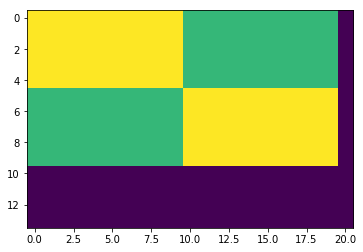

In [91]:
plt.imshow(fit_map.T)


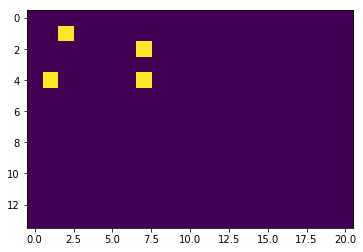

In [92]:
plt.imshow(fixed_map.T)

#### Segmenting Image by type of flow:

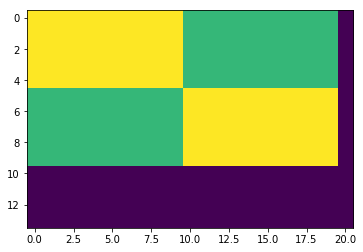

In [93]:
# fit_map[0:11,0:11]=2
# fit_map[11:22,11:22]=6
# fit_map[0:11,11:22]=6
# fit_map[11:22,0:11] = 2
np.set_printoptions(threshold=np.nan)
fit_map=fit_map.T
# print fit_map
plt.imshow(fit_map) #,origin='lower')

#### Visulaizing Fixed Points with likelihood values(proportional to the fit)

Text(0.5,1,u'Fixed Point Map')

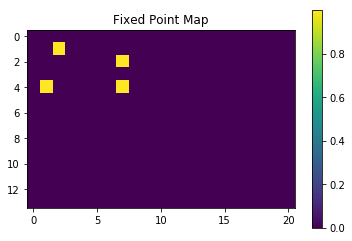

In [94]:
fixed_map =fixed_map.T
# fixed_map = np.around(fixed_map)
# fixed_map = fixed_map.clip(min=0)
# plt.scatter(x,y,s= fixed_map,alpha =0.5)
plt.imshow(fixed_map)#,origin='lower')
plt.colorbar(orientation='vertical')
plt.title('Fixed Point Map')
# print fixed_map




#### Critical points

In [33]:
# fixed_map_1 = fixed_map.clip(min=0)
# fixed_map_1 = np.around(fixed_map_1)
# indx = np.nonzero(fixed_map_1)
# print indx
# x_fin,y_fin = sum(indx[0])/len(indx[0]), sum(indx[1])/len(indx[1])
# # x_fin,y_fin = sum(indx)/len(indx)
# fixed_map_1[x_fin,y_fin] = 0.
# print x_fin,y_fin
# plt.plot(y_fin,x_fin,'*',label = 'Centroid')

# plt.imshow(fixed_map_1,origin='lower')
# plt.colorbar(orientation='vertical')
# plt.title('Fixed Point Map')
# plt.legend()

#### Taking Centroids of Critical/Fixed points within regions of similar flow

In [95]:
#preprocessing - run once
# fixed_map = fixed_map.T
fit_map_1= fit_map
fit_map_gray = fit_map_1 * 40

(array([1, 2, 4, 4]), array([2, 7, 1, 7]))


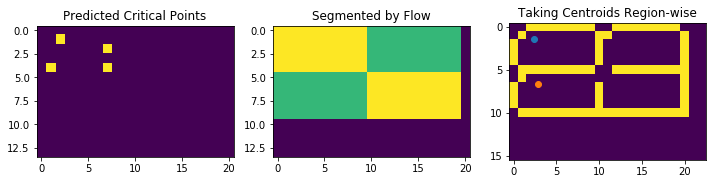

In [96]:
fig = plt.figure(figsize=(12,8))
# print indx   

img = cv2.imread('first.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fixed_map_1 = fixed_map.clip(min=0.)
# fixed_map_1 = np.around(fixed_map_1)
indx = np.nonzero(fixed_map_1)
print indx
plt.subplot(1,3,1)
plt.imshow(fixed_map_1) #,origin='lower')
plt.title('Predicted Critical Points')

plt.subplot(1,3,2)
plt.title('Segmented by Flow')
plt.imshow(fit_map) #,origin='lower')


fit_map_1= fit_map
plt.subplot(1,3,3)
fit_map_gray_Copy = np.uint8(fit_map_gray)
plt.title('Taking Centroids Region-wise')

fit_map_gray_Copy = np.pad(fit_map_gray_Copy, pad_width=1, mode='constant', constant_values=0)
edged = cv2.Canny(fit_map_gray_Copy, 90, 115)
edged1=edged

imagecnt,contours,hierarchy= cv2.findContours(edged1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(imagecnt) #,origin='lower')
centroid_x=np.zeros((len(contours)-1,1))
centroid_y = np.zeros((len(contours)-1,1))
no_contours = np.arange(len(contours))
covered =[]


for i in (reversed(no_contours)):
    if i > 0:
        cnt = contours[i]
        counts = 0.1
        for j in range (len(indx[0])):
            if j not in covered:
                test = cv2.pointPolygonTest(cnt,(indx[0][j],indx[1][j]),False)

                if test >= 0 :
                    
#                     print 'coveredd!',indx[0][j],indx[1][j]
                    covered.append(j)
                    counts+=1

                    centroid_x[-i],centroid_y[-i]= indx[0][j]+centroid_x[-i] , indx[1][j]+centroid_y[-i] 
                elif test == 0:
                    pass
                    print 'on border!'
#         print centroid_x,centroid_y[0]
        centroid_x[-i], centroid_y[-i] = centroid_x[-i]/counts,centroid_y[-i]/counts

        plt.plot(centroid_x[-i],centroid_y[-i],'o')

       
        

#### Visualizing Critical Points

4 2


Text(0.5,1,u'Multiple Critical Points')

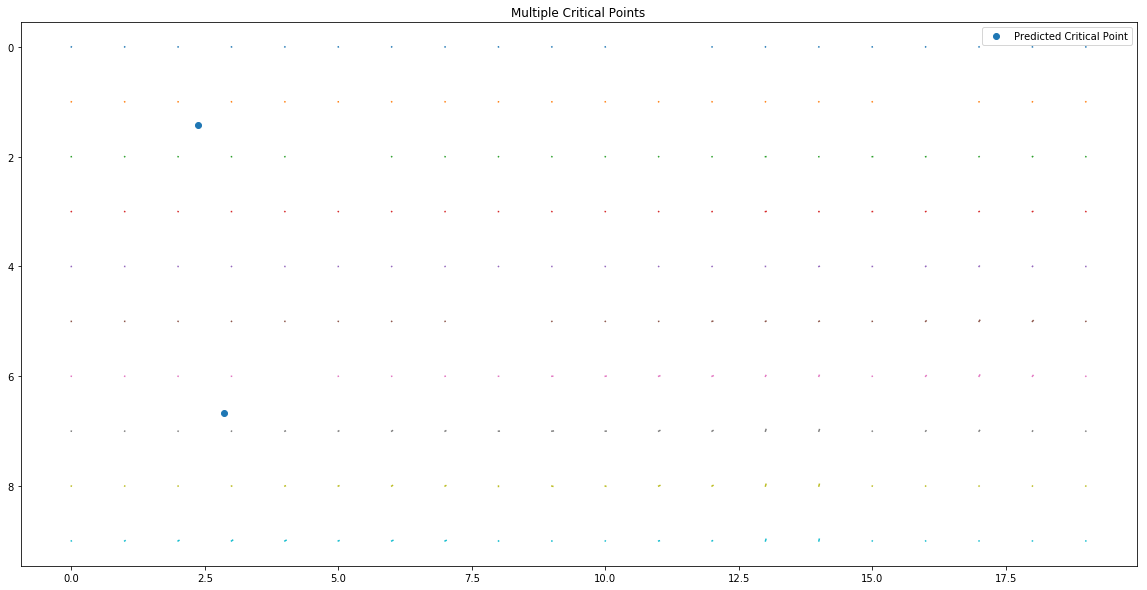

In [97]:
# fig = plt.figure(figsize=(20,10))

# for x in range(0,flow_x):
#     for y in range(0,flow_y):
#         plt.plot([x,x+X_dash[x,y,0]/15],[y,y+X_dash[x,y,1]/15],'-')
print n_windows_x,n_windows_y
fig =plt.figure(figsize=(20,10))
for x in range(0,n_windows_x*w_size):
    for y in range(0,n_windows_y*w_size):
        plt.plot([x,x+dom_image[x,y,0]/3],[y,y+dom_image[x,y,1]/3],'-')
plt.gca().invert_yaxis()
# plt.show()
plt.plot(centroid_x,centroid_y,'o',label='Predicted Critical Point')
plt.legend()
plt.title('Multiple Critical Points')

#### Reading Image Sequence

In [2]:
#####################################################################

# Example : perform live visualization of optic flow from a video file
# specified on the command line (e.g. python FILE.py video_file) or from
# an attached web camera

# Author : Toby Breckon, toby.breckon@durham.ac.uk

# Copyright (c) 2017 School of Engineering & Computing Science,
#                    Durham University, UK
# License : LGPL - http://www.gnu.org/licenses/lgpl.html

#####################################################################

import cv2
import sys
import numpy as np
#np.set_printoptions(threshold=np.nan)
#####################################################################

keep_processing = True;
camera_to_use = 0; # 0 if you have one camera, 1 or > 1 otherwise

#####################################################################

# draw optic flow visualization on image using a given step size for
# the line glyphs that show the flow vectors on the image

def draw_flow(img, flow, step=2):
    h, w = img.shape[:2]
    #print img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    #print np.shape(flow), np.shape(x), step
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    #print lines[0][0][0]
#     print (np.shape(fx),np.shape(fy))

    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
        cv2.circle(vis, (240,320),5,(255,0,0),-1)
    return vis
    cv2.circle(vis, (200,80),1,(255,0,0),-1)

#####################################################################

# define video capture object

# cap = cv2.VideoCapture();
# cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/manipulator_data/18/images/%1d.jpg")


# define display window name

windowName = "Dense Optic Flow"; # window name
averageName = 'average'

# if command line arguments are provided try to read video_name
# otherwise default to capture from attached H/W camera
frame_count = 0

if True :#(((len(sys.argv) == 2) and (cap.open(str(sys.argv[1]))))
#     or (cap.open(camera_to_use))):
#     
#     cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/manipulator_data/16/images/%1d.jpg")
    cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test002/%3d.tif")
#     cap.open('0020.avi')
    # create window by name (as resizable)

    cv2.namedWindow(windowName, cv2.WINDOW_NORMAL);
    cv2.namedWindow(averageName, cv2.WINDOW_NORMAL);

    # if video file successfully open then read an initial frame from video

    if (cap.isOpened):
        ret, frame = cap.read();

    # convert image to grayscale to be previous frame
    prevgray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    prevavg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    while (keep_processing):

        # if video file successfully open then read frame from video

        if (cap.isOpened):
            ret, frame = cap.read();

            # when we reach the end of the video (file) exit cleanly

            if (ret == 0):
                keep_processing = False;
                continue;

        # convert image to grayscale
       
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        avg =  cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # compute dense optic flow using technique of Farneback 2003
        # parameters from example (OpenCV 3.2):
        # https://github.com/opencv/opencv/blob/master/samples/python/opt_flow.py

#         flow = cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        flow = cv2.calcOpticalFlowFarneback(prevavg, avg, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        frame_count+=1
        if frame_count==1:
            frame_add = frame
            flow1=flow
#             frame_count+=1
#             frame_count+=0
        elif frame_count>1 and frame_count <90:
#             frame_count+=1
            flow1+=flow
            frame_add = frame + frame_add
#             prevavg = frame_add
            cv2.imshow(windowName, frame_add)
            cv2.waitKey(2000)
            if frame_count==89:
                flow=flow1/90.
                frame_add = frame_add/90.
                frame_count=0
                keep_processing = False
#             flow1= flow
        
        
        #print flow
        prevgray = gray
        
        prevavg = avg
        

        # display image with optic flow overlay
        
        cv2.imshow(windowName, draw_flow(avg, flow))
        
        
#         prevgray = cv2.Circle(prevgray, (200,80), 1, (255,0,0), thickness=1, lineType=8, shift=0) 
#         cv2.imshow(windowName, prevgray)
        
    
        # start the event loop - essential
        
        # cv2.waitKey() is a keyboard binding function (argument is the time in milliseconds).
        # It waits for specified milliseconds for any keyboard event.
        # If you press any key in that time, the program continues.
        # If 0 is passed, it waits indefinitely for a key stroke.
        # (bitwise and with 0xFF to extract least significant byte of multi-byte response)

        key = cv2.waitKey(40) & 0xFF; # wait 40ms (i.e. 1000ms / 25 fps = 40 ms)

        # It can also be set to detect specific key strokes by recording which key is pressed

        # e.g. if user presses "x" then exit

        if (key == ord('x')):
            
            keep_processing = False;

    # close all windows

    #cv2.destroyAllWindows()

else:
    print("No video file specified or camera connected.");
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
cv2.imshow('chosen', freezed_image)
cv2.waitKey(1000)

In [21]:
print np.shape(flow)
h = np.shape(flow)[0]
w = np.shape(flow)[1]
step = 5
y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
print len(y),len(x)
#print np.shape(flow), np.shape(x), step
fx, fy = flow[y,x].T
flow_sub = flow[y,x]
# flow_sub =  flow[::25,::35,:]
# flow_sub =  flow[::17,::57,:] #works_1
# flow_sub =  flow[::3,::10,:] #nice_1
flow_sub =  flow[::1,::1,:]
X_dash = np.transpose(flow_sub, (1, 0, 2))
print np.shape(fx)
print np.shape(flow_sub)
# X_dash = flow_sub
print np.shape(X_dash)

(158, 238, 2)
1536 1536
(1536,)
(158, 238, 2)
(238, 158, 2)


In [38]:
import matplotlib.pyplot as plt
flow_x = np.shape(flow_sub)[0]
flow_y = np.shape(flow_sub)[1]
print flow_x
print flow_y
fig = plt.figure(figsize=(15,10))
for x in range(0,flow_x):
    for y in range(0,flow_y):
#         plt.plot([x,x+flow_sub[x,y,0]/16],[y,y+flow_sub[x,y,1]/16],'-')
        pass
# plt.plot(centroid_x,centroid_y,'o',label='Predicted Critical Point')
# plt.legend()
# plt.title('Multiple Critical Points')

185
612


In [127]:
a= np.ones((3,3))
b= np.ones((3,3))
c =a*b
print np.sin(b-2)
print (np.sum(c*np.sin((b-2))))
np.sum(c*np.sin(b-2))/10

[[-0.84147098 -0.84147098 -0.84147098]
 [-0.84147098 -0.84147098 -0.84147098]
 [-0.84147098 -0.84147098 -0.84147098]]
-7.573238863271069


-0.7573238863271069

#### Read Image Sequence

In [2]:
cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/manipulator_data/16/images/%1d.jpg")

# /home/pranav/Downloads/RnD/training/image_02/0014_turn
keep =True
while(keep):
    ret,frame = cap.read()
#     frame  =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('image',frame)
    key = cv2.waitKey(40) & 0xFF;
    if (key == ord('x')):
            
            keep = False;
    
#     print(frame.shape)

error: /tmp/binarydeb/ros-kinetic-opencv3-3.3.1/modules/highgui/src/window.cpp:331: error: (-215) size.width>0 && size.height>0 in function imshow


#### CMA-ES

In [14]:
import cma, time
start = time.clock()
es = cma.CMAEvolutionStrategy(10 * [0], 0.5)
res = es.optimize(cma.ff.rosen)
print res.result.xbest[0]
print time.clock()- start

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1071113, Tue Dec  4 22:06:59 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 1.532384637916658e+02 1.0e+00 4.37e-01  4e-01  4e-01 0:00.0
    2     20 1.795590812800653e+02 1.2e+00 4.06e-01  4e-01  4e-01 0:00.0
    3     30 1.262291997332483e+02 1.2e+00 3.69e-01  3e-01  4e-01 0:00.0
  100   1000 8.409085649064370e+00 5.8e+00 2.25e-02  8e-03  4e-02 0:00.4
  200   2000 5.116121769176537e+00 7.4e+00 3.64e-02  8e-03  2e-02 0:00.7
  300   3000 2.634042676838614e+00 1.2e+01 5.76e-02  7e-03  2e-02 0:01.1
  400   4000 4.048480556405251e-01 2.0e+01 8.09e-02  5e-03  3e-02 0:01.5
  500   5000 7.849363986484351e-04 4.5e+01 1.20e-02  4e-04  8e-03 0:02.0
  600   6000 1.379277351246638e-10 8.7e+01 1.89e-05  3e-07  1e-05 0:02.4
  657   6570 1.197406963181725e-14 8.6e+01 2.47e-07  2e-09  7e-08 0:02.6
1.0000000005553427
4.077059


In [231]:
a= np.array([.006,.06,.24,.38,1,.38,.24,.06, .006])*273
print a/4
a = a.reshape((1,-1)).T
b = a.T
c = a.dot(b)
print c

[ 0.4095  4.095  16.38   25.935  68.25   25.935  16.38    4.095   0.4095]
[[2.68304400e+00 2.68304400e+01 1.07321760e+02 1.69926120e+02
  4.47174000e+02 1.69926120e+02 1.07321760e+02 2.68304400e+01
  2.68304400e+00]
 [2.68304400e+01 2.68304400e+02 1.07321760e+03 1.69926120e+03
  4.47174000e+03 1.69926120e+03 1.07321760e+03 2.68304400e+02
  2.68304400e+01]
 [1.07321760e+02 1.07321760e+03 4.29287040e+03 6.79704480e+03
  1.78869600e+04 6.79704480e+03 4.29287040e+03 1.07321760e+03
  1.07321760e+02]
 [1.69926120e+02 1.69926120e+03 6.79704480e+03 1.07619876e+04
  2.83210200e+04 1.07619876e+04 6.79704480e+03 1.69926120e+03
  1.69926120e+02]
 [4.47174000e+02 4.47174000e+03 1.78869600e+04 2.83210200e+04
  7.45290000e+04 2.83210200e+04 1.78869600e+04 4.47174000e+03
  4.47174000e+02]
 [1.69926120e+02 1.69926120e+03 6.79704480e+03 1.07619876e+04
  2.83210200e+04 1.07619876e+04 6.79704480e+03 1.69926120e+03
  1.69926120e+02]
 [1.07321760e+02 1.07321760e+03 4.29287040e+03 6.79704480e+03
  1.78869600